In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import linregress
from datetime import datetime as dt



from re import sub
from decimal import Decimal

In [25]:
metro_csv = "Output/metro_date_group.csv"
suburb_csv = "Output/suburb_date_group.csv"
housing1963_csv = "Output/housing1963_df.csv"
lumber_csv = "Output/lumber_df.csv"
spx_csv = "Output/spx_df.csv"
interest_rate_csv = "Output/interest_rate_df.csv"

metro_df = pd.read_csv(metro_csv, index_col = 'Date')
metro_df.index = pd.to_datetime(metro_df.index)

suburb_df = pd.read_csv(suburb_csv, index_col = 'Date')
suburb_df.index = pd.to_datetime(suburb_df.index)

housing1963_df = pd.read_csv(housing1963_csv, index_col = 'Date')
housing1963_df.index = pd.to_datetime(housing1963_df.index)

lumber_df = pd.read_csv(lumber_csv, index_col = 'Date')
lumber_df.index = pd.to_datetime(lumber_df.index)

spx_df = pd.read_csv(spx_csv, index_col = 'Date')
spx_df.index = pd.to_datetime(spx_df.index)

interest_rate_df = pd.read_csv(interest_rate_csv, index_col = 'Date')
interest_rate_df.index = pd.to_datetime(interest_rate_df.index)

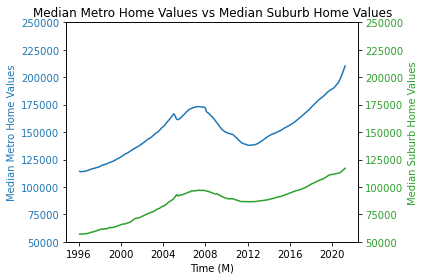

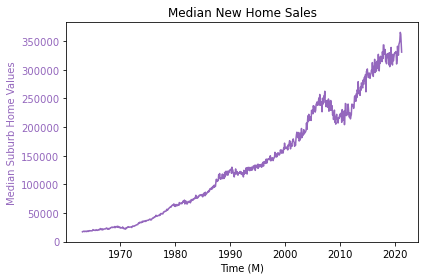

In [144]:
# Merge a data frame
multimerge_df = pd.merge_asof(housing1963_df, metro_df, on="Date")
multimerge_df = pd.merge_asof(multimerge_df, suburb_df, on="Date")
multimerge_df = pd.merge_asof(multimerge_df, lumber_df, on="Date")
multimerge_df = pd.merge_asof(multimerge_df, spx_df, on="Date")
multimerge_df = pd.merge_asof(multimerge_df, interest_rate_df, on="Date")
multimerge_df.set_index('Date', inplace=True)
    
'''
with pd.option_context('display.max_rows', None):
    print(metro_lumber_df )
'''
### PLOT 1 ###
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time (M)')
ax1.set_ylabel('Median Metro Home Values', color=color)
ax1.plot(multimerge_df.index, multimerge_df['Value_x'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(50000, 250000)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Median Suburb Home Values', color=color)  # we already handled the x-label with ax1
ax2.plot(multimerge_df.index, multimerge_df['Value_y'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(50000, 250000)

plt.title("Median Metro Home Values vs Median Suburb Home Values")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### PLOT 2 ###
fig, ax1 = plt.subplots()
color = 'tab:purple'
ax1.set_xlabel('Time (M)')
ax1.set_ylabel('Median Suburb Home Values', color=color)
ax1.plot(multimerge_df.index, multimerge_df['Median New Home Sales'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

plt.title("Median New Home Sales")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

            Median New Home Sales   Value_x   Value_y  Lumber_Close  \
Date                                                                  
1963-01-31                  17200       NaN       NaN           NaN   
1963-02-28                  17700       NaN       NaN           NaN   
1963-03-31                  18200       NaN       NaN           NaN   
1963-04-30                  18200       NaN       NaN           NaN   
1963-05-31                  17500       NaN       NaN           NaN   
1963-06-30                  18000       NaN       NaN           NaN   
1963-07-31                  18400       NaN       NaN           NaN   
1963-08-31                  17800       NaN       NaN           NaN   
1963-09-30                  17900       NaN       NaN           NaN   
1963-10-31                  17600       NaN       NaN           NaN   
1963-11-30                  18400       NaN       NaN           NaN   
1963-12-31                  18700       NaN       NaN           NaN   
1964-0

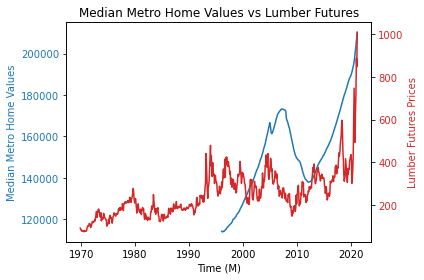

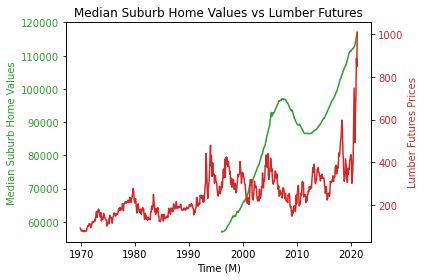

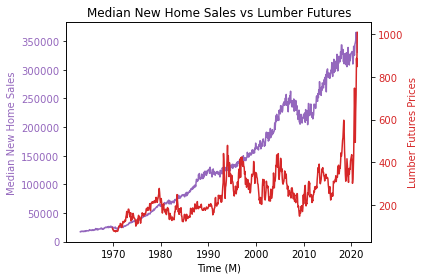

In [69]:

### PLOT 1 ###
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time (M)')
ax1.set_ylabel('Median Metro Home Values', color=color)
ax1.plot(multimerge_df.index, multimerge_df['Value_x'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Lumber Futures Prices', color=color)  # we already handled the x-label with ax1
ax2.plot(multimerge_df.index, multimerge_df['Lumber_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Median Metro Home Values vs Lumber Futures")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### PLOT 2 ###
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Time (M)')
ax1.set_ylabel('Median Suburb Home Values', color=color)
ax1.plot(multimerge_df.index, multimerge_df['Value_y'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Lumber Futures Prices', color=color)  # we already handled the x-label with ax1
ax2.plot(multimerge_df.index, multimerge_df['Lumber_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Median Suburb Home Values vs Lumber Futures")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


### PLOT 3 ###
fig, ax1 = plt.subplots()

color = 'tab:purple'
ax1.set_xlabel('Time (M)')
ax1.set_ylabel('Median New Home Sales', color=color)
ax1.plot(multimerge_df.index, multimerge_df['Median New Home Sales'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Lumber Futures Prices', color=color)  # we already handled the x-label with ax1
ax2.plot(multimerge_df.index, multimerge_df['Lumber_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Median New Home Sales vs Lumber Futures")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



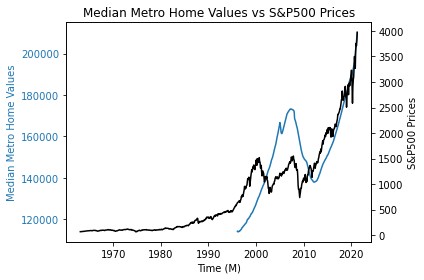

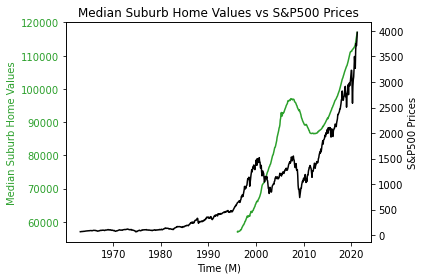

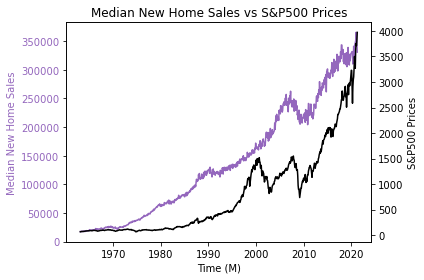

In [77]:
### PLOT 1 ###
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time (M)')
ax1.set_ylabel('Median Metro Home Values', color=color)
ax1.plot(multimerge_df.index, multimerge_df['Value_x'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('S&P500 Prices', color=color)  # we already handled the x-label with ax1
ax2.plot(multimerge_df.index, multimerge_df['SPX_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Median Metro Home Values vs S&P500 Prices")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### PLOT 2 ###
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Time (M)')
ax1.set_ylabel('Median Suburb Home Values', color=color)
ax1.plot(multimerge_df.index, multimerge_df['Value_y'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('S&P500 Prices', color=color)  # we already handled the x-label with ax1
ax2.plot(multimerge_df.index, multimerge_df['SPX_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Median Suburb Home Values vs S&P500 Prices")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


### PLOT 3 ###
fig, ax1 = plt.subplots()

color = 'tab:purple'
ax1.set_xlabel('Time (M)')
ax1.set_ylabel('Median New Home Sales', color=color)
ax1.plot(multimerge_df.index, multimerge_df['Median New Home Sales'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('S&P500 Prices', color=color)  # we already handled the x-label with ax1
ax2.plot(multimerge_df.index, multimerge_df['SPX_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Median New Home Sales vs S&P500 Prices")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


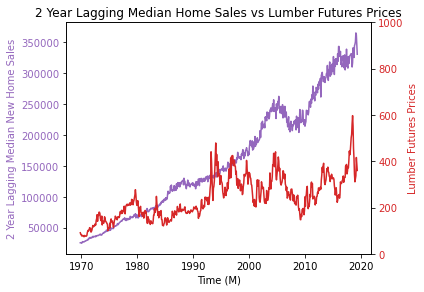

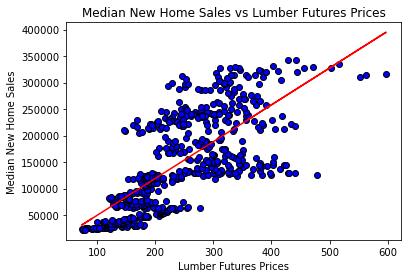

y = 694.59x + -19844.35


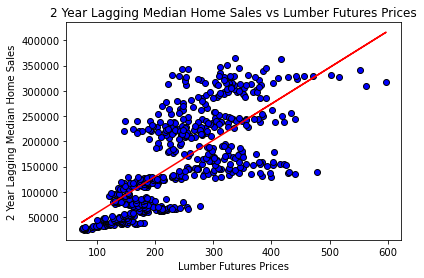

y = 718.6x + -13209.07


"\nwith pd.option_context('display.max_rows', None):\n    print(housing_lumber_delay)\n"

In [138]:
###################### GO UP
housing_lumber_df = pd.merge_asof(housing1963_df, lumber_df, on="Date")
metro_lumber_df = pd.merge_asof(metro_df, lumber_df, on="Date")
suburb_lumber_df = pd.merge_asof(suburb_df, lumber_df, on="Date")

###Delay housing------------------


housing_lumber_delay = housing_lumber_df
housing_lumber_delay['2 Year Lagging Home Sales'] = housing_lumber_delay['Median New Home Sales'].shift(-24)
housing_lumber_delay_nadrop = housing_lumber_delay.dropna(axis=0)

fig, ax1 = plt.subplots()

color = 'tab:purple'
ax1.set_xlabel('Time (M)')
ax1.set_ylabel('2 Year Lagging Median New Home Sales', color=color)
ax1.plot(housing_lumber_delay_nadrop['Date'], housing_lumber_delay_nadrop['2 Year Lagging Home Sales'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_ylabel('Lumber Futures Prices', color=color) 
ax2.plot(housing_lumber_delay_nadrop['Date'], housing_lumber_delay_nadrop['Lumber_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0, 1000)

fig.tight_layout() 

plt.title("2 Year Lagging Median Home Sales vs Lumber Futures Prices")

plt.show()
#Scatter Plot1
x_values = housing_lumber_delay_nadrop['Lumber_Close']
y_values = housing_lumber_delay_nadrop['Median New Home Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(housing_lumber_delay_nadrop['Lumber_Close'], housing_lumber_delay_nadrop['Median New Home Sales'], 
         linestyle='none', marker="o", color="blue", markeredgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3, 1),fontsize=15,color="red")
plt.title("Median New Home Sales vs Lumber Futures Prices")
plt.xlabel("Lumber Futures Prices")
plt.ylabel('Median New Home Sales')
plt.show()
print(line_eq)

#Scatter plot2
x_values = housing_lumber_delay_nadrop['Lumber_Close']
y_values = housing_lumber_delay_nadrop['2 Year Lagging Home Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(housing_lumber_delay_nadrop['Lumber_Close'], housing_lumber_delay_nadrop['2 Year Lagging Home Sales'], 
         linestyle='none', marker="o", color="blue", markeredgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3, 1),fontsize=15,color="red")
plt.title("2 Year Lagging Median Home Sales vs Lumber Futures Prices")
plt.xlabel("Lumber Futures Prices")
plt.ylabel("2 Year Lagging Median Home Sales")
plt.show()

print(line_eq)







'''
with pd.option_context('display.max_rows', None):
    print(housing_lumber_delay)
'''


In [143]:
housing_lumber_nadrop = housing_lumber_df.dropna(axis=0)
corr = st.pearsonr(housing_lumber_nadrop['Lumber_Close'], housing_lumber_nadrop['Median New Home Sales'])
display(corr)

corr2 = st.pearsonr(housing_lumber_delay_nadrop['Lumber_Close'], housing_lumber_delay_nadrop['2 Year Lagging Home Sales'])
display(corr2)


(0.7200406234375527, 5.213675620692771e-96)

(0.7166939220889741, 9.917583842876017e-95)

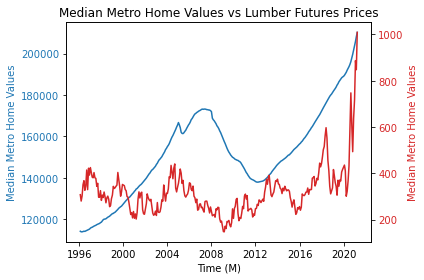

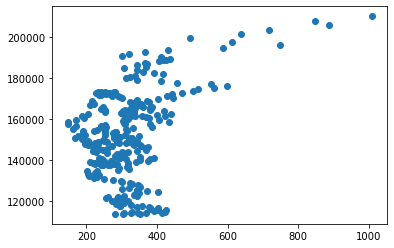

(0.3871945663901096, 2.8204236460303476e-12)

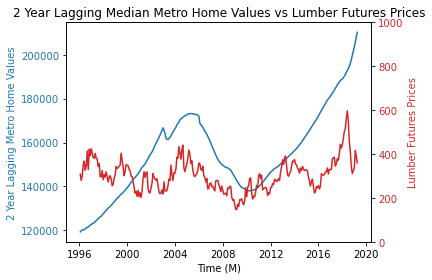

(0.3462204735408532, 2.818515474988906e-09)

In [132]:


'''
with pd.option_context('display.max_rows', None):
    print(metro_lumber_df )
'''


#Line graph over time

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time (M)')
ax1.set_ylabel('Median Metro Home Values', color=color)
ax1.plot(metro_lumber_df['Date'], metro_lumber_df['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_xlabel('Time (M)')
ax2.set_ylabel('Median Metro Home Values', color=color)
ax2.plot(metro_lumber_df['Date'], metro_lumber_df['Lumber_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Median Metro Home Values vs Lumber Futures Prices")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#plt.legend()
plt.show()


#Scatter plot
plt.plot(metro_lumber_df['Lumber_Close'], metro_lumber_df['Value'], linestyle='none', marker='o')
plt.show()

#Correlation

metro_lumber_nadrop = metro_lumber_df.dropna(axis=0)
corr = st.pearsonr(metro_lumber_nadrop['Lumber_Close'], metro_lumber_nadrop['Value'])
display(corr)



###Delay housing------------------
metro_lumber_delay = metro_lumber_df
metro_lumber_delay['2 Year Lagging Metro Home Values'] = metro_lumber_delay['Value'].shift(-24)
metro_lumber_delay_nadrop = metro_lumber_delay.dropna(axis=0)

    
'''
with pd.option_context('display.max_rows', None):
    print(metro_lumber_df )
'''




fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time (M)')
ax1.set_ylabel('2 Year Lagging Metro Home Values', color=color)
ax1.plot(metro_lumber_delay_nadrop['Date'], metro_lumber_delay_nadrop['2 Year Lagging Metro Home Values'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Lumber Futures Prices', color=color)  # we already handled the x-label with ax1
ax2.plot(metro_lumber_delay_nadrop['Date'], metro_lumber_delay_nadrop['Lumber_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0, 1000)
plt.title("2 Year Lagging Median Metro Home Values vs Lumber Futures Prices")

fig.tight_layout()  # otherwise the right y-label is slightly clipped




plt.show()


#Scatter plot
#plt.plot(metro_lumber_delay_nadrop['Lumber_Close'], metro_lumber_delay_nadrop['2 Year Lagging Metro Home Values'], 
         #marker="o", color="blue", edgecolors="black")
#plt.show()



corr2 = st.pearsonr(metro_lumber_delay_nadrop['Lumber_Close'], metro_lumber_delay_nadrop['2 Year Lagging Metro Home Values'])
display(corr2)


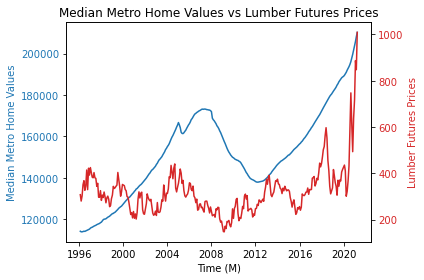

(0.06831024945546749, 0.2554495214438049)

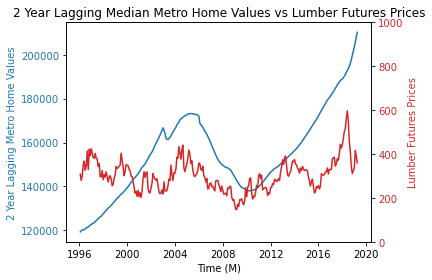

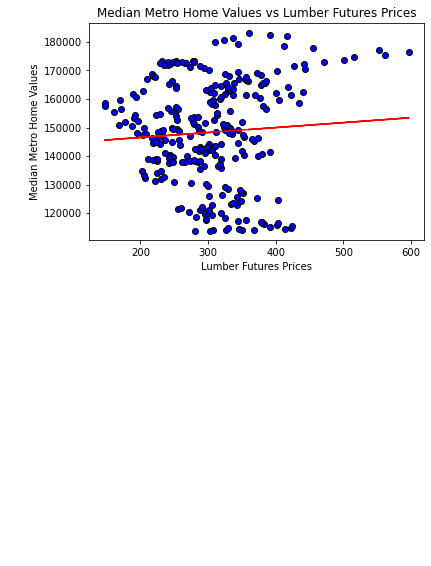

y = 17.33x + 143049.64


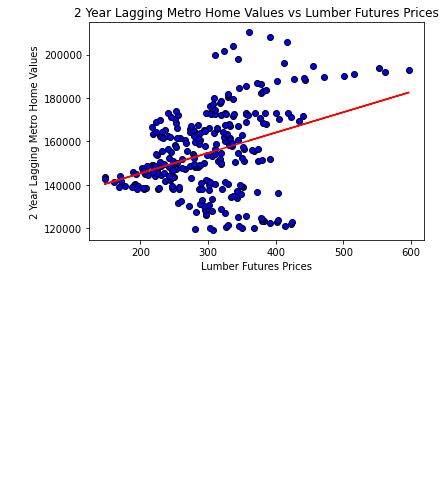

y = 93.84x + 126529.35


(0.3462204735408532, 2.818515474988906e-09)

In [142]:
############## GO UP

'''
with pd.option_context('display.max_rows', None):
    print(metro_lumber_df )
'''


#Line graph over time

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time (M)')
ax1.set_ylabel('Median Metro Home Values', color=color)
ax1.plot(metro_lumber_df['Date'], metro_lumber_df['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_xlabel('Time (M)')
ax2.set_ylabel('Lumber Futures Prices', color=color)
ax2.plot(metro_lumber_df['Date'], metro_lumber_df['Lumber_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Median Metro Home Values vs Lumber Futures Prices")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#plt.legend()
plt.show()




#Correlation

metro_lumber_nadrop = metro_lumber_df.dropna(axis=0)
corr = st.pearsonr(metro_lumber_nadrop['Lumber_Close'], metro_lumber_nadrop['Value'])
display(corr)



###Delay housing------------------
metro_lumber_delay = metro_lumber_df
metro_lumber_delay['2 Year Lagging Metro Home Values'] = metro_lumber_delay['Value'].shift(-24)
metro_lumber_delay_nadrop = metro_lumber_delay.dropna(axis=0)

    
'''
with pd.option_context('display.max_rows', None):
    print(metro_lumber_df )
'''




fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time (M)')
ax1.set_ylabel('2 Year Lagging Metro Home Values', color=color)
ax1.plot(metro_lumber_delay_nadrop['Date'], metro_lumber_delay_nadrop['2 Year Lagging Metro Home Values'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Lumber Futures Prices', color=color)  # we already handled the x-label with ax1
ax2.plot(metro_lumber_delay_nadrop['Date'], metro_lumber_delay_nadrop['Lumber_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0, 1000)

plt.title("2 Year Lagging Median Metro Home Values vs Lumber Futures Prices")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#plt.legend()
plt.show()


#Scatter plot
x_values = metro_lumber_nadrop['Lumber_Close']
y_values = metro_lumber_nadrop['Value']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(metro_lumber_nadrop['Lumber_Close'], metro_lumber_nadrop['Value'], 
         linestyle='none', marker="o", color="blue", markeredgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3, 1),fontsize=15,color="red")
plt.title("Median Metro Home Values vs Lumber Futures Prices")
plt.xlabel("Lumber Futures Prices")
plt.ylabel("Median Metro Home Values")
plt.show()
print(line_eq)

#Scatter plot2
x_values = metro_lumber_nadrop['Lumber_Close']
y_values = metro_lumber_nadrop['2 Year Lagging Metro Home Values']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(metro_lumber_nadrop['Lumber_Close'], metro_lumber_nadrop['2 Year Lagging Metro Home Values'], 
         linestyle='none', marker="o", color="blue", markeredgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3, 1),fontsize=15,color="red")
plt.title("2 Year Lagging Metro Home Values vs Lumber Futures Prices")
plt.xlabel("Lumber Futures Prices")
plt.ylabel('2 Year Lagging Metro Home Values')
plt.show()
print(line_eq)

corr2 = st.pearsonr(metro_lumber_delay_nadrop['Lumber_Close'], metro_lumber_delay_nadrop['2 Year Lagging Metro Home Values'])
display(corr2)